In [44]:
#https://blog.51cto.com/u_15858929/6170422

In [45]:
import matplotlib.pyplot as plt
import numpy as np

#加载数据集，最后一列最为目标值，前面的为特征属性的值
fileName=r"C:\Users\WMU\Desktop\FILE1.csv"
def loadDataSet(fileName):
    xArr = []; yArr = []
    for line in open(fileName).readlines():
        curLine = line.strip().split(',')
        #文件格式是 .csv，但代码中使用了 \t（制表符）作为分隔符。CSV 文件通常是用逗号（,）分隔的，
        # 需要用逗号作为分隔符。TSV文件用 \t（制表符）作为分隔符
        xonerow = [1.0]   #添加1.0作为第一个系数，则第一个系数的权重用来代表y=wx+b中的b变量
        for i in range(len(curLine)-1):#len(curLine) - 1 表示排除最后一个元素
            xonerow.append(float(curLine[i]))  #最后一列为输出结果值y，前面的值为输入x值
        xArr.append(xonerow)
        yArr.append(float(curLine[-1]))  #添加最后一列为结果值

    return xArr, yArr

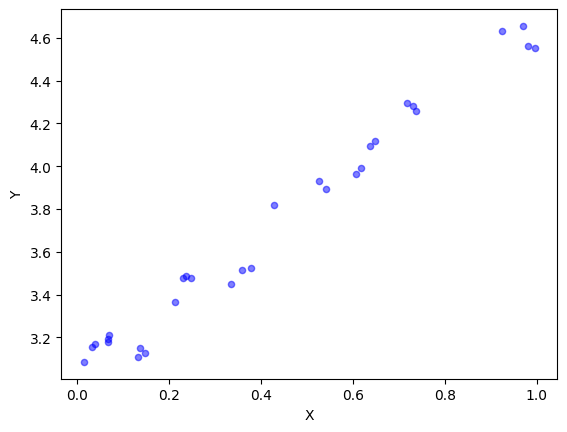

In [46]:
#绘制二维数据集
def plotDataSet():
    xArr, yArr = loadDataSet(fileName)                                #加载数据集
    xcord = [xArr[i][1] for i in range(len(xArr))]
    ycord = [yArr[i] for i in range(len(yArr))]                         #样本点
    fig = plt.figure()
    ax = fig.add_subplot(111)                                            #添加subplot
    ax.scatter(xcord, ycord, s = 20, c = 'blue',alpha = .5)                #绘制样本点
    plt.xlabel('X');plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    plotDataSet()

In [47]:
#最小二乘法计算回归系数。xArr为样本数据集，包含m个对象，n种属性。yarr为结果数据集
def standRegres(xArr,yArr):
    xMat = np.asmatrix(xArr)       #转化为x矩阵。自动形成m行n列
    yMat = np.asmatrix(yArr).reshape(len(yArr),1)    
    #转化为y列向量为了后续矩阵运算的方便，通常需要将 yArr 转换为一个列向量。
    #因此，使用 reshape(len(yArr), 1) 来改变其形状，使其成为一个 len(yArr) 行 1 列的矩阵（即列向量）。
    xTx = xMat.T * xMat       #根据文中推导的公示计算回归系数
    if np.linalg.det(xTx) == 0.0:   #对不能求逆的结果返回
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T*yMat)  #最小二乘求导出为0时的权重向量
    return ws

![alt text](image-1.png)

![alt text](image.png)

[[3.02863046]
 [1.6314263 ]]


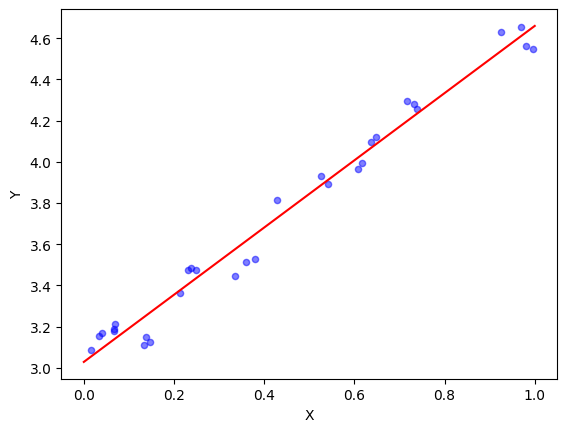

In [48]:
# 绘制样本数据集，求解回归曲线，绘制回归曲线。regression为计算回归系数的函数
def plotRegression(regression):
    # 计算回归系数
    xArr, yArr = loadDataSet(fileName)                                    #加载数据集
    ws = regression(xArr, yArr)                                           #计算回归系数列向量
    print(ws)

    xMat = np.asmatrix(xArr)                                                    #创建xMat矩阵
    yMat = np.asmatrix(yArr)                                                    #创建yMat矩阵（行向量）

    # 绘制样本数据集
    xarr = xMat[:, 1].flatten().A[0]  # 将矩阵第一列转化为一行矩阵，并获取第一行的列表
    yarr = yMat.flatten().A[0]  # 将矩阵第一列转化为一行矩阵，并获取第一行的行向量
    plt.scatter(xarr, yarr, s=20, c='blue', alpha=.5)  # 绘制样本点

    # 绘制回归系数。通过两个待测点，预测其值。以直线的形式反映出回归系数。
    testArr = np.array([[1,0],[1,1]]) #将对象[1,0]和对象[1,1]最为待测对象，第一个1为常值代表偏量，后面的分量代表属性x的值
    yHat = np.dot(testArr,ws) #计算使用线性模型预测的y值。dot就是矩阵乘法。
    plt.plot(testArr[:,1], yHat, c = 'red')  #绘制回归曲线，x为第1列，y为结果列向量，
    plt.xlabel('X');plt.ylabel('Y')
    plt.show()

if __name__ == '__main__':
    plotRegression(standRegres)

梯度下降法

In [51]:
#梯度下降法计算回归系数。xArr为属性数据集，每行为一个对象。yArr为结果数据集，每行为一个对象的结果。
def gradAscent(xArr,yArr):
    xMatrix = np.asmatrix(xArr) #转换成numpy的矩阵。xMatrix每行为一个对象，每列为一种特征属性
    yMatrix = np.asmatrix(yArr).reshape(len(yArr),1) #转换成numpy的矩阵,并变维成列向量
    m, n = np.shape(xMatrix)  #返回dataMatrix的大小。m为样本对象的个数,n为列数。
    alpha = 0.001     #移动步长,也就是学习速率,控制更新的幅度。
    maxCycles = 500       #最大迭代次数
    weights = np.ones((n,1))     #初始化权重列向量
    for k in range(maxCycles):
        h =  xMatrix * weights    #梯度上升矢量化公式，计算预测值（列向量）
        error = h - yMatrix      #计算误差
        weights = weights - alpha * 2 * xMatrix.T * error       # 调整回归系数
    return weights.getA()        #将矩阵转换为数组，返回权重数组

[[3.01830318]
 [1.65370732]]


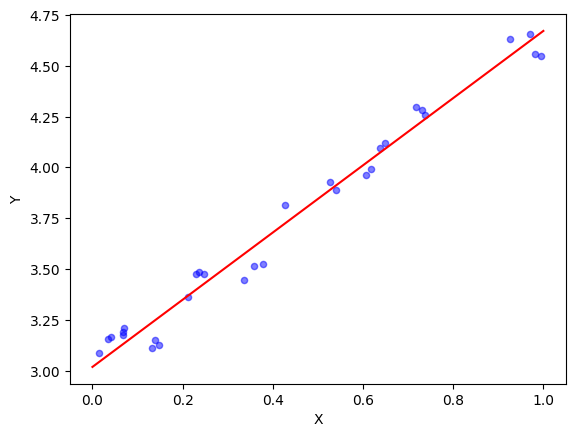

In [53]:
if __name__ == '__main__':
    plotRegression(gradAscent)

随机下降法

[[3.03501804]
 [1.62654039]]


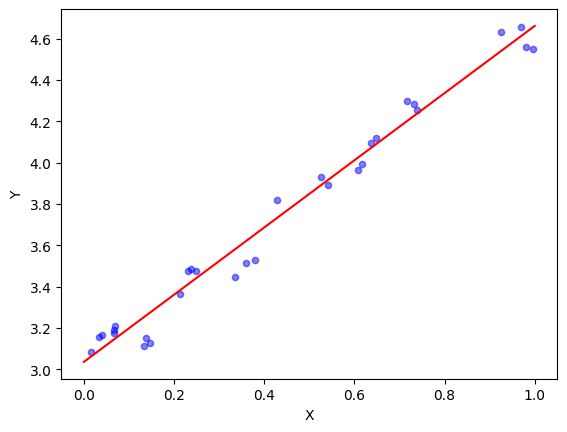

In [54]:
#随机梯度下降法计算回归系数
def randgradAscent(xArr,yArr):
    xMatrix = np.asmatrix(xArr)  #转换成numpy的矩阵。xMatrix每行为一个对象，每列为一种特征属性
    yMatrix = np.asmatrix(yArr).reshape(len(yArr),1)  #转换成numpy的矩阵,并变维成列向量
    m, n = np.shape(xMatrix)   #返回dataMatrix的大小。m为样本对象的个数,n为列数。
    maxCycles = 100     #最大迭代次数
    weights = np.ones((n,1))         #初始化权重列向量
    for i in range(maxCycles):
        for k in range(m):
            alpha = 4 / (1.0 + i + k) + 0.01      # 降低alpha的大小，每次减小1/(j+i)。刚开始的时候可以步长大一点，后面调整越精细
            h =  xMatrix[k] * weights     #随机梯度上升矢量化公式，计算预测值y
            error = h - yMatrix[k]     #计算误差
            weights = weights - 2*alpha * xMatrix[k].T * error    # 调整回归系数
    return weights.getA()          #将矩阵转换为数组，返回权重数组

if __name__ == '__main__':
    plotRegression(randgradAscent)

L1正则化、L2正则化
L1正则化是指权值向量w中各个元素的绝对值之和
L2正则化是指权值向量w中各个元素的平方和然后再求平方根（可以看到Ridge回归的L2正则化项有平方符号）

L1正则化和L2正则化可以看做是损失函数的惩罚项。对于线性回归模型，使用L1正则化的模型建叫做Lasso回归，使用L2正则化的模型叫做Ridge回归（岭回归）。
L2 和 L1 采用不同的方式降低权重：

L2 会降低权重^2。
L1 会降低 |权重|。
因此，L2 和 L1 具有不同的导数：

L2 的导数为 2 * 权重。
L1 的导数为 k（一个常数，其值与权重无关）。

但是由于lasso回归的损失函数是不可导的，所以梯度下降算法将不再有效，下面利用坐标轴下降法进行求解。

坐标轴下降法和梯度下降法具有同样的思想，都是沿着某个方向不断迭代，但是梯度下降法是沿着当前点的负梯度方向进行参数更新，而坐标轴下降法是沿着坐标轴的方向。

局部加权线性回归（LWLR）

矩阵为奇异矩阵,不能求逆
矩阵为奇异矩阵,不能求逆


C:\Users\WMU\AppData\Local\Temp\ipykernel_22508\1145368810.py:69: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))       # 为每个周边节点设定权重。越近的节点权重越大，越远的节点权重越小


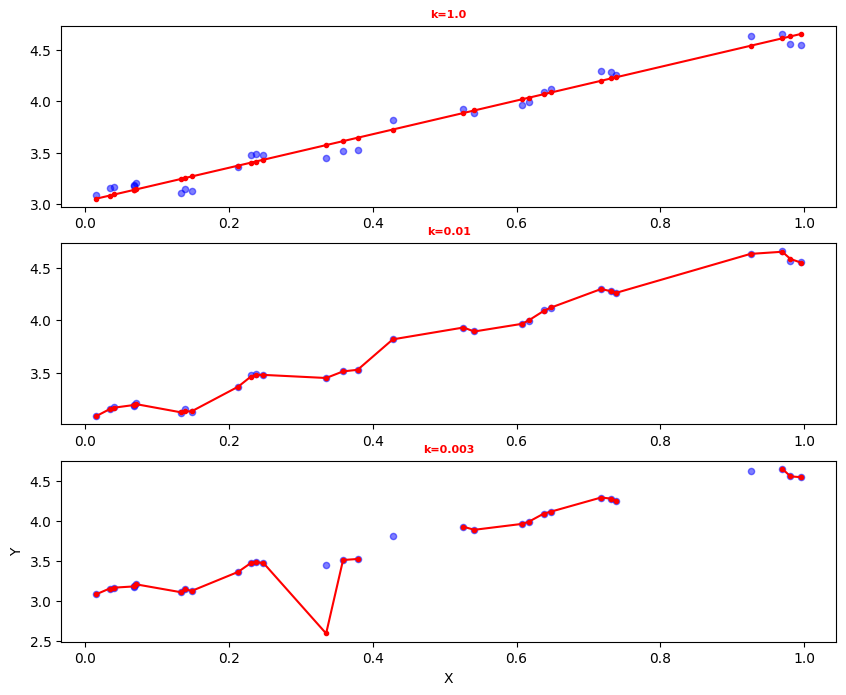

In [57]:
import matplotlib.pyplot as plt
import numpy as np

#加载数据集，最后一列最为目标值，前面的为特征属性的值
def loadDataSet(fileName):
    xArr = []; yArr = []
    for line in open(fileName).readlines():
        curLine = line.strip().split(',')
        xonerow = [1.0]   #添加1.0作为第一个系数，则第一个系数的权重用来代表y=wx+b中的b变量
        for i in range(len(curLine)-1):
            xonerow.append(float(curLine[i]))  #最后一列为输出结果值y，前面的值为输入x值
        xArr.append(xonerow)
        yArr.append(float(curLine[-1]))  #添加最后一列为结果值

    return xArr, yArr


# 局部加权线性回归。绘制多条局部加权回归曲线
def plotlwlrRegression():
    xArr, yArr = loadDataSet(fileName)                                    #加载数据集
    xMat = np.asmatrix(xArr)                                                    #创建xMat矩阵。属性数据集，每行为一个样本对象，每列为一种属性
    yMat = np.asmatrix(yArr).reshape(len(yArr),1)                               #创建yMat矩阵。将结果值存储成列向量

    testMat = xMat                     #原样选取样本数据集作为测试集。看看预测结果与真实结果之间的差距
    m = np.shape(testMat)[0]          # 计算待测数据集的样本个数
    yHat_1 = []  # 定义一个列表用来存储预测值
    yHat_2 = []  # 定义一个列表用来存储预测值
    yHat_3 = []  # 定义一个列表用来存储预测值
    for i in range(m):  # 对每个待测样本点进行预测
        yHat_1.append(lwlr(testMat[i,:], xMat, yMat, 1.0))                    # 根据局部加权线性回归计算yHat
        yHat_2.append(lwlr(testMat[i,:], xMat, yMat, 0.01))                   # 根据局部加权线性回归计算yHat
        yHat_3.append(lwlr(testMat[i,:], xMat, yMat, 0.003))                   # 根据局部加权线性回归计算yHat
    yHat_1 = np.asmatrix(yHat_1).reshape(len(yHat_1),1)
    yHat_2 = np.asmatrix(yHat_2).reshape(len(yHat_2), 1)
    yHat_3 = np.asmatrix(yHat_3).reshape(len(yHat_3), 1)


    srtInd = xMat[:, 1].argsort(0)                                              #将样本数据集，第2列排序，返回索引值
    xSort = xMat[srtInd][:,0,:]                                                 #根据排序索引，将所有列排序
    ySort_1 = yHat_1[srtInd][:,0,:]
    ySort_2 = yHat_2[srtInd][:,0,:]
    ySort_3 = yHat_3[srtInd][:,0,:]

    fig, axs = plt.subplots(nrows=3, ncols=1,figsize=(10,8))                    #创建三个子图
    axs[0].plot(xSort[:,1], ySort_1, c = 'red',marker='.')                        #绘制回归曲线
    axs[1].plot(xSort[:,1], ySort_2, c = 'red',marker='.')                        #绘制回归曲线
    axs[2].plot(xSort[:,1], ySort_3, c = 'red',marker='.')                        #绘制回归曲线

    axs[0].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[1].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点
    axs[2].scatter(xMat[:,1].flatten().A[0], yMat.flatten().A[0], s = 20, c = 'blue', alpha = .5)                #绘制样本点

    #设置标题,x轴label,y轴label
    axs0_title_text = axs[0].set_title(u'k=1.0', size=8, weight='bold', color='red')
    axs1_title_text = axs[1].set_title(u'k=0.01', size=8, weight='bold', color='red')
    axs2_title_text = axs[2].set_title(u'k=0.003', size=8, weight='bold', color='red')


    plt.xlabel('X');plt.ylabel('Y')
    plt.show()


# 使用局部加权线性回归计算回归系数w。不同的待测点获得的回归系数都不同。testPoint待测对象，xArr样本数据集，yArr结果数据集，k - 高斯核的k，表示拟合程度，为0表示100%拟合,自定义参数
def lwlr(testPoint, xMat, yMat, k = 1.0):
    m = np.shape(xMat)[0]                                               # 获取样本数量
    weights = np.asmatrix(np.eye((m)))                                       # 初始化局部权重对角矩阵。这里的局部权重矩阵是为待测点周边的每个节点赋予的影响矩阵。并不是线性回归系数。
    for j in range(m):                                                 # 遍历数据集计算每个样本的权重
        diffMat = testPoint - xMat[j,:]                                # 计算样本中每个对象与待测对象之间的距离
        weights[j, j] = np.exp(diffMat * diffMat.T/(-2.0 * k**2))       # 为每个周边节点设定权重。越近的节点权重越大，越远的节点权重越小
    xTx = xMat.T * (weights * xMat)                                     #  增加了局部权重矩阵，增大临近节点的影响力，降低远方节点的影响力
    if np.linalg.det(xTx) == 0.0:
        print("矩阵为奇异矩阵,不能求逆")
        return
    ws = xTx.I * (xMat.T * (weights * yMat))                            # 计算回归系数
    y = testPoint * ws                                                  # 计算预测值，矩阵相乘得到的是矩阵。虽然只有一个元素
    return y[0,0]       #读取矩阵的值，返回数值


if __name__ == '__main__':
    plotlwlrRegression()